In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
from mesa.space import MultiGrid

Create two classes composing the system, the individual agent proporties and interaction proporties making up the model.

In [17]:
Arrr = []
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
    


    def step(self):
        if self.wealth < 1:
            sucker = self.random.choice(self.model.schedule.agents)
            sucker_wealth = sucker.wealth
            k =1
            while k !=0:
                if sucker_wealth >0:
                    k=0
                sucker = self.random.choice(self.model.schedule.agents)
                sucker_wealth = sucker.wealth

            self.wealth = 1
            sucker.wealth -=1
        else:    
            other_agent = self.random.choice(self.model.schedule.agents)
            other_agent.wealth += 1
            self.wealth -= 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True, #Moore range of moves
            include_center=True #can stay in same place or not
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos]) ####**********
        if len(cellmates) > 1: #exchange happens when there is more than one neighbour ~ experiment with making this zero
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

            

    def step(self):
        self.move()
        if self.wealth > 0: #debt not considerred here
            self.give_money()

    # def add(self):


In [18]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, torus= True) #torus space ~ wraps around
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

            x = self.random.randrange(self.grid.width) # each agent initially placed in a random cell on the grid
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y)) #keeping track of coordinates of agents

    # T=0
    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()
        # T=0 
        # T+=1
        

    def add_in(self , Nw ):
        self.num_agents +=Nw
        for i in range (Nw):
            a = MoneyAgent(i, self)
            self.schedule = RandomActivation(self)
            x = self.random.randrange(self.grid.width) # each agent initially placed in a random cell on the grid
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y)) #keeping track of coordinates of agents






        ### add some more agents
        # nID = self.num_agents 
        # ii =0
        # ii+=1
        # a = MoneyAgent(nID+ii, self)
        # x = self.random.randrange(self.grid.width) # each agent initially placed in a random cell on the grid
        # y = self.random.randrange(self.grid.height)
        # self.grid.place_agent(a, (x, y)) #keeping track of coordinates of agents    

        



Text(0.5, 1.0, 'Plot showing the average of 100 experiments,\n initially we have 10 agents,\n evloved for 10 exchanges in random sequence \n grid dimensions are 10x10 cells ')

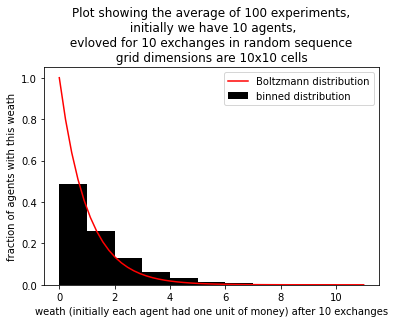

In [19]:
all_wealth = []
new_agents_wealth = []
N=200
for j in range(10):
    # Run the model
    model = MoneyModel(N,10,10)
    for i in range(100):

        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
        # if agent.unique_id > 100:
        #     new_agents_wealth.append(agent.wealth)
# print('fff',  len(model.schedule))


        

w = np.linspace(0, max(all_wealth)+1  )
BG = np.exp(-w) #histogram already normalised
plt.hist(all_wealth, bins=range(max(all_wealth)+1) , density=True, color = "black" , label="binned distribution" )
plt.plot(w, BG, 'r-' , label= 'Boltzmann distribution')
plt.legend()

plt.xlabel('weath (initially each agent had one unit of money) after 10 exchanges')
plt.ylabel('fraction of agents with this weath')
plt.title('Plot showing the average of 100 experiments,\n initially we have 10 agents,\n evloved for 10 exchanges in random sequence \n grid dimensions are 10x10 cells ' )

In [20]:
# T_invst = 10
# MR = 1000
# model.add_in(MR)
# # print(model.num_agents)
# MT = []
# for i in range(T_invst):
#     model.step()
#     mt = 0
#     for agent in model.schedule.agents:
#         if agent.unique_id > N:
#             mt += agent.wealth
#     MT.append(mt)
        

# plt.plot(MT)

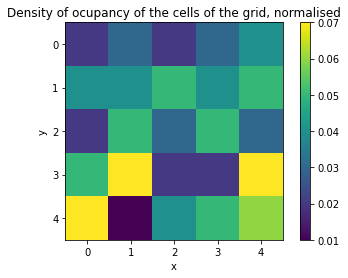

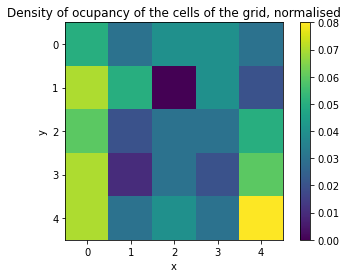

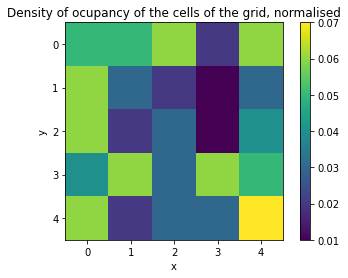

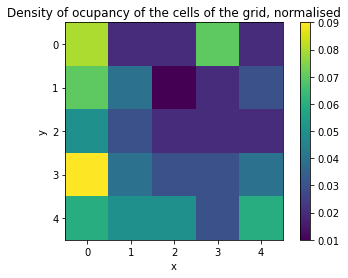

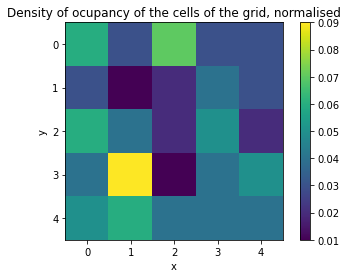

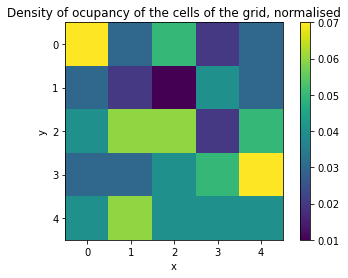

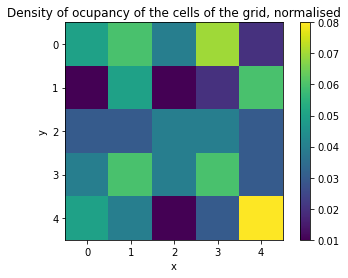

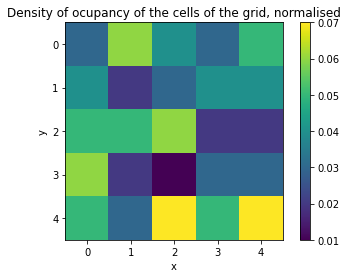

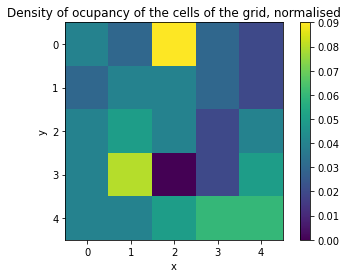

In [21]:
model = MoneyModel(100, 5, 5)
for i in range(300):
    model.step()

    if i>290:
        agent_counts = np.zeros((model.grid.width, model.grid.height))
        cell_content_s = agent_counts
        for cell in model.grid.coord_iter():
            cell_content, x, y = cell
            agent_count = len(cell_content)/100
            agent_counts[x][y] = agent_count

            # cell_content_s[x][y] = np.matrix(  model.grid.get_cell_list_contents(cell)  )
            # plt.figure()
            # for agent in model.schedule.agents:
            #     welf = []
            #     welf.append(agent.wealth)
            # plt.hist(welf, bins=range(max(welf)+1) , density=True )
            
            
                

        plt.figure()
        plt.imshow(agent_counts, interpolation='nearest')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar()
        plt.title('Density of ocupancy of the cells of the grid, normalised')

# plt.figure()
# self.model.grid.get_cell_list_contents([self.pos])

# esm = np.amax(agent_counts)
# lc = np.where(agent_counts == np.amax(agent_counts))
# print(lc)
# lc = agent_counts.index(max(agent_counts))
